# Assignment on k-NN Classification

## Problem Statement:
In the following diagram let blue circles indicate positive examples and orange squares indicate negative examples. We want to use k-NN algorithm for classifying the points. If k=3, find the class of the point (6,6). Extend the same example for distance k-NN and Locally weighted Averaging


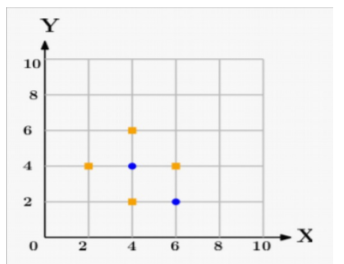

## Blooms Taxonomy

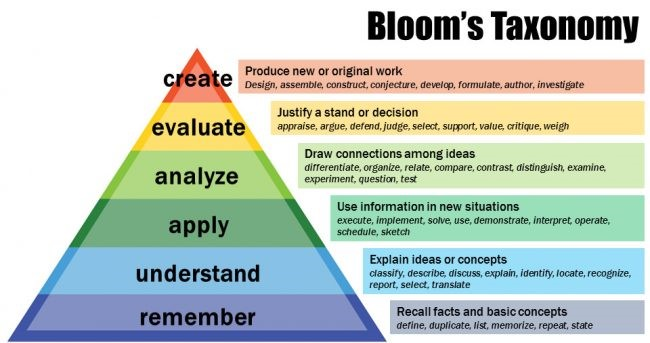

Bloom’s Taxonomy was created by Benjamin Bloom in 1956, published as a kind of classification of learning outcomes and objectives, it is a set of three hierarchical models used to classify educational learning objectives into levels of complexity and specificity. The three lists cover the learning objectives in cognitive, affective and sensory domains. The cognitive domain list has been the primary focus of most traditional education and is frequently used to structure curriculum learning objectives, assessments and activities. This document is a reflection of learning objectives in a cognitive domain.

## Objectives:
* **Evaluate** the significance of distance measures and k value in k Nearest Neighbors algorithm

* **Analyze** the data and determine why k-NN is the adviced method for the given task

* **Apply** k Nearest Neighbors algorithm on the given data

* **Understand and Remember** k Nearest Neighbors algorithm and its variations

## Learning in k-NN? 

**Instance Based Learning:**
Instance-based methods are sometimes referred to as "lazy" learning methods because they delay processing until a new instance must be classified. Learning in these algorithms consists of simply storing the presented training data. When a new query instance is encountered, a different approximation to the target function is constructed. A key advantage of this kind of delayed, or lazy, learning is that instead of estimating the target function once for the entire instance space, these methods can estimate it locally and differently for each new instance to be classified.
k-NN constructs only a local approximation to the target function that applies in the neighborhood of the new query
instance, and never construct an approximation designed to perform well over the entire instance space. This has significant advantages when the target function is very complex, but can still be described by a collection of less complex local approximations.

## Why supervised learning?
Supervised learning involves selecting a heuristic function using distinctly known feature/s to map labels. By observing the given data we can conclude that the input features and output labels are distinctly known, hence satisfying the rules necessary for the use of supervised learning.

## Programmer's Perspective:

Let S be the programmer's perspective of the linear regression, such that S = {s, e, X, Y, $f_{me}$, $f_{i}^{f}$ $Mem_{shared}$| Φ}

s = Start State
- {($X_{i}$, $y_{i}$): i ∈ N, $X_{i}$ = ($X_{i}^{0}$,$X_{i}^{1}$), $X_{i}^{0}$ $\large \epsilon$ $\mathbb{R}$, $X_{i}^{1}$ $\large \epsilon$ $\mathbb{R}$, $y_{i}$ $\large \epsilon$ {orange, blue} }
- $X_{i}^{0}$ : x-coordinate
- $X_{i}^{1}$ : y-coordinate
- k = { number of neighbors }, k $\large \epsilon$ [3,length of the dataset]

e = { Mapping the given point with the appropriate class }

X = {X,y}
* X: Feature values
    - x: { x-coordinate | $x$ $\large \epsilon$ $\mathbb{R}$ }
    - y: { y-coordinate | $y$ $\large \epsilon$ $\mathbb{R}$ }
    - k: { number of neighbors | k $\large \epsilon$ [3,length of the dataset] }
* y: Output values =  { $ y_i $ | $ y_i $ is the predicted class for point $ X_i $, $ y_i $ $ \large \epsilon $ {orange, blue}, $ i $ $ \large \epsilon $ $ \mathbb{N} $ },

$f_{me}$ = Function $f_{me}$ can be defined as $\large f_{me}: X \rightarrow y$<br>
$f_{me}$: { KNearestNeighbors | X = (df, k, input_val, weight, metric), y=prediction}
   - df : {(X,y)}
   - k : { number of neighbors }, k $\large \epsilon$ [3,length of the dataset] 
   - input_val : { x, y | x=x-coordinate, y=y-coordinate }
   - weight : { type of k-NN }, weight $\large \epsilon $ {distance, uniform}
   - metric : { method for distance calculation }, metric $\large \epsilon $ {manhatten, euclidean}
   - y = prediction: { output label | y $\large \epsilon $ {blue, orange} }
   - Method to implement k nearest neighbors algorithm

$f_{i}^{f}$ = friend functions: {$ f_1 $, $ f_2 $, $ f_3 $}
For ever function $f_{i}$ in $f_{i}^{f}$:<br> 
$$\large f_{i}: X \rightarrow y$$

- f1: { euclidean_distance | X=(point_a, point_b), y=distance }
    - point_a, point_b : { coordinates of a point in the dataset }
    - y = distance : { Euclidean distance between two points }, distance $\large \epsilon $ [0, $\infty$)
    - Method to calculate euclidian distance between two points point_a and point_b
    
    
- f2: { manhattan_distance | X=(point_a, point_b), y=distance }
    - point_a, point_b : { coordinates of a point in the dataset }
    - y = distance : { Manhattan distance between two points }, distance $\large \epsilon $ [0, $\infty$)
    - Method to calculate manhattan distance between two points point_a and point_b
    
    
- f3: { weighted_prediction | X = nearest_neighbors, y = prediction } 
    - nearest_neighbors: { [($X_{0}^{0}$,$X_{0}^{1}$), ($X_{1}^{0}$,$X_{1}^{1}$),... ($X_{k-1}^{0}$,$X_{k-1}^{1}$)] | $X_{i}^{0}$ = x-coordinate, $X_{i}^{1}$ = y-coordinate }
    - y = prediction: { output label | y $\large \epsilon $ {blue, orange} }
    - Method to predict class based on the weighted frequency of nearest neighbors
    
$Mem_{shared}$ = { Shared resource for all threads to store prediction for given set of input }

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import threading
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,classification_report
import warnings
warnings.filterwarnings('ignore')
import sys

In [2]:
data = {
    'x': [2, 4, 4, 4, 6, 6], 
    'y': [4, 2, 4, 6, 2, 4],
    'label':["orange", "orange", "blue", "orange", "blue", "orange"]
} 
df = pd.DataFrame.from_dict(data) 
label = "label"

In [3]:
df.head()

,x,y,label
0,2,4,orange
1,4,2,orange
2,4,4,blue
3,4,6,orange
4,6,2,blue


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,6.0,4.333333,1.505545,2.0,4.0,4.0,5.5,6.0
y,6.0,3.666667,1.505545,2.0,2.5,4.0,4.0,6.0


In [5]:
df['label'].value_counts()

orange    4
blue      2
Name: label, dtype: int64

In [6]:
df.shape

(6, 3)

In [7]:
# Function to validate the provided data to k-NN algorithm
def check_data(df, k, input_val, weight, metric):
    if len(input_val) != df.shape[1]-1:
        print("Provided input points are invalid")
        return False
    if k > len(df):
        print("k value cannot be greater than size of the dataset")
        return False
    if weight not in ['distance', 'uniform']:
        print("Param weight takes values distance or uniform")
        return False
    if metric not in ['manhattan','euclidean']:
        print("Param metric takes values manhattan or euclidean")
        return False
    return True

## k-NN  ( Blooms Taxonomy: Understand and Remember )
The underlying intuition behind k-NN is that you look like your neighbors. More formally, the method follows the compactness hypothesis: if the distance between the examples is measured well enough, then similar examples are much more likely to belong to the same class.

Consider the following example, according to the nearest neighbors method, the green ball would be classified as "blue" rather than "red".

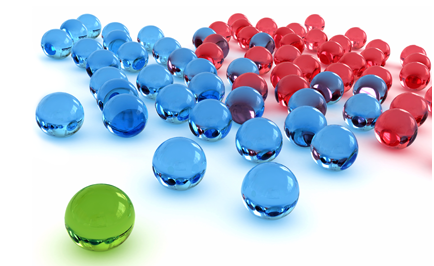

To classify each sample from the test set, one needs to perform the following operations in order:
1. Calculate the distance to each of the samples in the training set.
2. Select $k$ samples from the training set with the minimal distance to them.
3. The class of the test sample will be the most frequent class among those $k$ nearest neighbors.

**Weighted k-NN** algorithm adds a refinement to the k-NN algorithm by addition of weight i.e the contribution
of each of the k neighbors according to their distance to the query point, giving greater weight to closer neighbors. Weighted k-NN is robust to noisy training data and quite effective when it is provided a sufficiently large set of training
data.

## Why k-NN? ( Blooms Taxonomy: Analyze )
- A notable feature of this approach is its laziness i.e calculations are only done during the prediction phase, when a test sample needs to be classified. No model is constructed from the training examples beforehand. 
- There exist many important theorems claiming that, on "endless" datasets, it is the optimal method of classification.
- Good interpretability as it answers the question "why was my example given class X?” with “because similar items are labeled with X". For example, consider a model assessing the risk involved with a loan. Here, a customer is judged to be high risk because 8 out of 10 customers who have been previously evaluated and were most similar to them in terms of X, Y, and Z, were found to be high risk. By observing the nearest neighbors, you can see objects similar to the example that are labeled as X, and you can decide whether the prediction makes sense.

## k-NN vs Linear Algorithms
- A kNN classifier is able to recover unstructured partitions of the space, as opposed to, say, a linear classifier that requires a linear separation between the classes. It can also adapt to different densities in the space, making it more robust than methods such as support vector machine (SVM) classification with radial basis function (RBF) kernel. The following two examples of 2D data illustrate different partitions of the space imposed by labeled data and the prediction of a kNN model on that space.

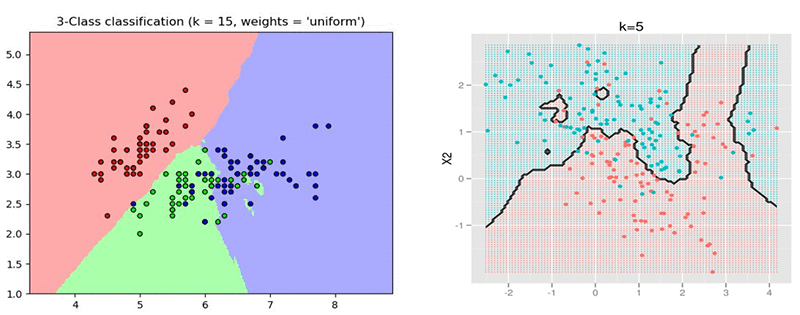

## k-NN vs Decision Tree

Consider the following classification problem, in which the classes are separated by a line. The solution generated by decision tree for this classification problem is an overly complex construction, although the solution is just a straight line  x1=x2. Here decision tree performs better and faster than decision tree.

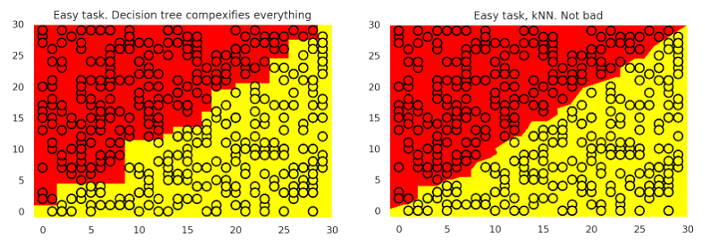

## Distance metrics:
- **Euclidean distance** is a good distance measure to use if the input variables are similar in type (e.g. all measured widths and heights). 
- **Manhattan distance** is a good measure to use if the input variables are not similar in type (such as age, gender, height, etc.).
- As computing Euclidean distance is computationally expensive for large datasets Manhattan distance is preferred.

## k value:
Choosing appropriate k value is very critical in the k-NN algorithm 
- A small value of k means that noise will have a higher influence on the result. 
- Larger values of K will have smoother decision boundaries which mean lower variance but increased bias, it is also computationally expensive and defeats the basic philosophy behind KNN ( that points that are near might have similar densities or classes ).
- A simple approach to select k is set **k = sqrt(N)**, where N is the size of the dataset
- Another way to choose k is though cross-validation, by selecting the k value which performs best on the validation set and minimizes the validation error.
- Generally **odd values of k** are preferred in order to avoid a split vote.

In [8]:
# Function to calculate euclidean distance between two points
def euclidean_distance(point_a, point_b):
    '''
    params: {point_a, point_b}
    - point_a, point_b : { coordinates of a point in the dataset }
    - type : list
    
    - returns: {distance}
    - distance : { Euclidean distance between point_a and point_b }
    - type: float
    '''
    distance = 0
    for i in range(len(point_a)):
        distance = distance + (point_a[i]-point_b[i])**2
    return distance**0.5

In [9]:
# Function to calculate manhattan distance between two points
def manhattan_distance(point_a, point_b):
    '''
    params: {point_a, point_b}
    - point_a, point_b : { coordinates of a point in the dataset }
    - type : list
    
    - returns: {distance}
    - distance : { Manhattan distance between point_a and point_b }
    - type: float
    '''
    distance = 0
    for i in range(len(point_a)):
        distance = distance + abs(point_a[i]-point_b[i])
    return distance

In [10]:
# Method to predict class based on the weighted frequency of nearest neighbors
def weighted_prediction(nearest_neighbors):
    '''
    params: {nearest_neighbors}
    - nearest_neighbors : { distance and class of k points from the dataset, nearest to input value }
    - type : list - [(distance, class),(distance, class), ...]
    
    - returns: {prediction}
    - prediction : { Output label i.e blue or orange }
    - type: string
    '''
    label_frequency = {}
    # Calculate weight for each label
    for distance, label in nearest_neighbors:
        if int(distance) == 0:
            label_frequency[label] = sys.maxsize
            break
        if label in label_frequency:
            label_frequency[label] += 1/distance
        else: label_frequency[label] = 1/distance
    # Return label having maximum weight
    return max(label_frequency, key=label_frequency.get) 

## Blooms Taxonomy:  Apply

In [11]:
# Method to implement k nearest neighbors algorithm
def KNearestNeighbors(X, y, k, input_val, weight, metric):
    '''
    params: {X, y, k, input_val, weight, metric}
    - X : { Input data }
    - type : list 
    
    - y : {Ouput label}
    - type : list
    
    - k : { number of neighbors }
    - type : int
    
    - input_val : { value for which output label is to be determined }
    - type : list - [x-coordinate, y-coordinate]
    
    - weight : { type of k-NN }
    - type : string
    
    - metric : { method for calculating distance }
    - type : string
    
    - returns: {prediction}
    - prediction : { Output label i.e blue or orange }
    - type: string
    '''
    # Calculate distance depending on the metrics
    distances = []
    if metric == 'manhattan':
        for i in range(len(X)):
            distances.append((manhattan_distance(X[i], input_val),y[i]))
    else:
        for i in range(len(X)):
            distances.append((euclidean_distance(X[i], input_val),y[i]))
                
    # Sort points according to the calculated distance 
    distances.sort(key=lambda distance: distance[0])
    if weight == 'distance': # Perform prediction using distance as weight
        nearest_neighbors = distances[:k].copy()
        prediction = weighted_prediction(nearest_neighbors)
    else: # Perform prediction based on frequency of ouput label in nearest neighbors(uniform)
        nearest_neighbors = distances[:k].copy()
        if int(distances[0][0]) == 0:
            prediction = distances[0][1]
            return prediction
        neighbor_classes = [label[1] for label in nearest_neighbors]
        prediction = max(set(neighbor_classes), key=neighbor_classes.count)
    return prediction

In [12]:
k = 3
metric = 'euclidean'
weight = 'uniform'
input_val = [6,6]
X=None
y=None
if check_data(df, k, input_val, weight, metric):
    X = df.drop(columns=[label]).values.tolist()
    y = df[label].values.tolist()
    print("Predicted value: ",KNearestNeighbors(X, y, k, input_val, weight, metric))

Predicted value:  orange


In [14]:
# Function to take input values from the user
def predict(X,y):
    '''
    params: {X, y, k, input_val, weight, metric}
    - X : { Input data }
    - type : list 
    
    - y : {Ouput label}
    - type : list
    
    - returns: {prediction}
    - prediction : { Output label i.e blue or orange }
    - type: string
    '''
    x_c = float(input('Enter x-coordinate: '))
    y_c = float(input('Enter y-coordinate: '))
        
    flag = True
    while flag:
        k = int(input('Enter k value: '))
        if k<3 or k>len(X):
            print("Please select provide a valid k value!")
        else:
            flag = False
        
    flag = True
    while flag:
        weight_inp = int(input('For distance weighted K-NN enter 1 otherwise enter 0: '))
        if weight_inp not in [0,1]:
            print("Please select provide a valid input!")
        else:
            if weight_inp == 1: weight = 'distance'
            else: weight = 'uniform'
            flag = False
    
    flag = True
    while flag:
        metric_inp = int(input('Metric - For manhatten distance enter 0 for euclidean distance enter 1: '))
        if metric_inp not in [0,1]:
            print("Please select provide a valid input!")
        else:
            if metric_inp == 1: metric = 'manhattan'
            else: metric = 'euclidean'
            flag = False
    print("\nPredicted value: ",KNearestNeighbors(X, y,  k, [x_c,y_c], weight=weight, metric=metric))
    return {'k':k, 'input_val': [x_c,y_c], 'weight':weight, 'metric':metric}

In [15]:
input_dict = predict(X, y)

Enter x-coordinate: 2
Enter y-coordinate: 4
Enter k value: 3
For distance weighted K-NN enter 1 otherwise enter 0: 1
Metric - For manhatten distance enter 0 for euclidean distance enter 1: 1

Predicted value:  orange


In [16]:
print(input_dict)

{'k': 3, 'input_val': [2.0, 4.0], 'weight': 'distance', 'metric': 'manhattan'}


## Sklearn Implementation

In [16]:
X_num = df.drop(columns=[label]).to_numpy()
y_num = df[label].to_numpy()

In [18]:
knn_classifier = KNeighborsClassifier(n_neighbors=3, weights='distance',p=2) # p=1 for manhattan and p=2 for euclidean
knn_classifier.fit(X_num, y_num)
print("Predicted value: ",knn_classifier.predict(np.array([input_dict['input_val']]))[0])

NameError: name 'X_num' is not defined

## Blooms Taxonomy:  Evaluate
**Impact of k-value on prediction using [breast cancer wisconsin dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29):**

**Attribute Information:**
1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

In [18]:
file_path = 'breast-cancer-wisconsin.csv'
df_cancer = pd.read_csv(file_path)
df_cancer.drop_duplicates()
df_cancer.head(5)

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,label
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [19]:
df_cancer.describe()

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,label
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,5.378619,4.222717,4.273942,3.746102,3.879733,4.806236,4.200445,3.828508,1.913140,3.051225
std,2.869029,3.251280,3.141494,3.158413,2.456544,3.880509,2.651634,3.387146,2.068909,0.999801
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,4.000000
75%,8.000000,7.000000,7.000000,6.000000,5.000000,10.000000,7.000000,7.000000,2.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Range for all attributes is (1-10) hence no scaling is required 

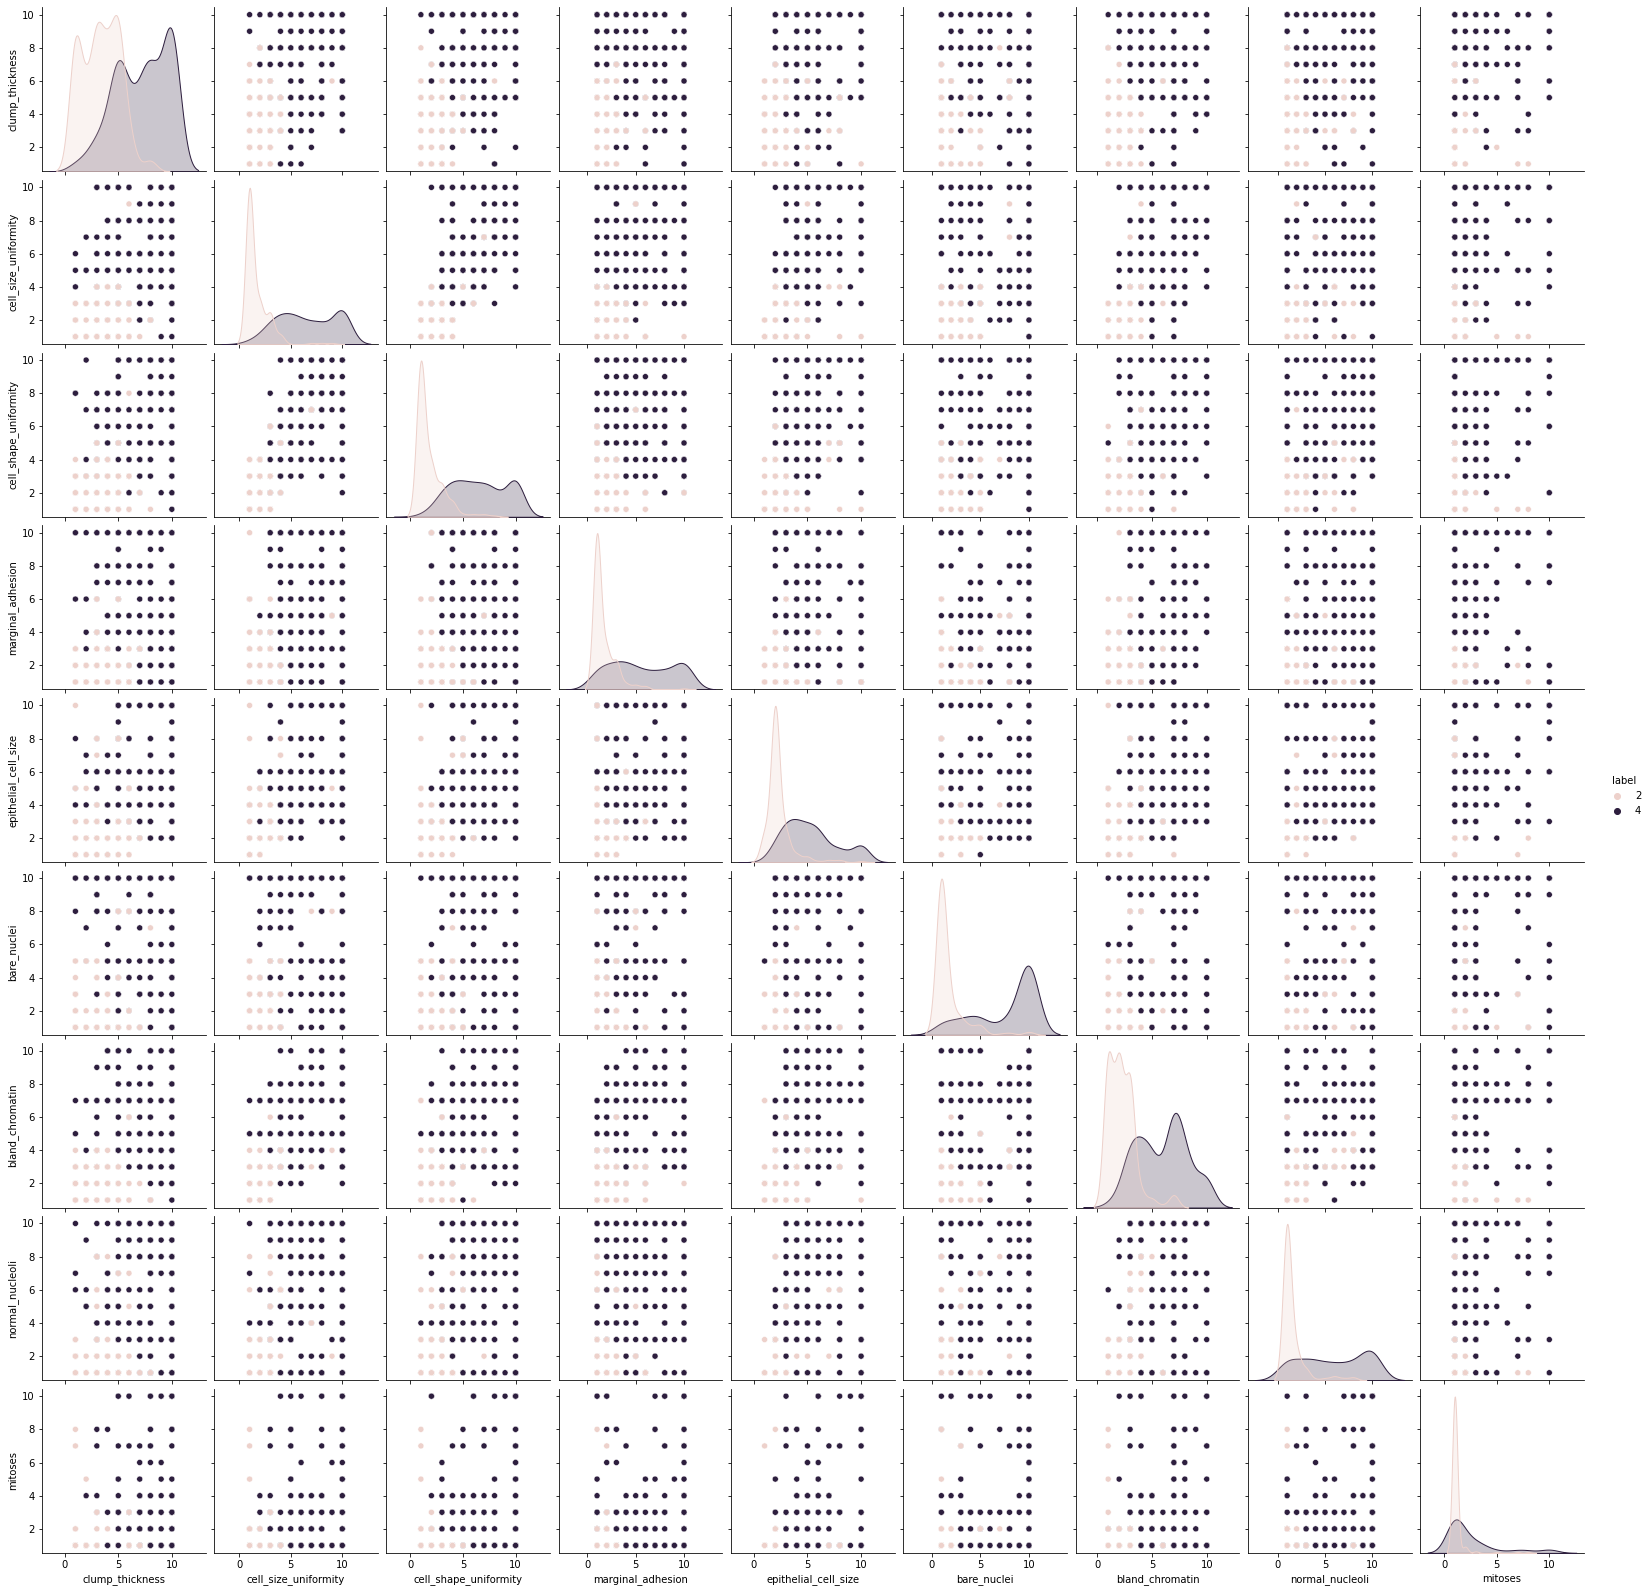

In [20]:
sns.pairplot(df_cancer, hue='label')

In [21]:
df_train, df_test = train_test_split(df_cancer, test_size=0.3, random_state = 42)

In [22]:
# Function to predict error rate
def error_rate(y_true, y_pred):
    length = len(y_pred)
    if len(y_true) != length:
        print("Error while calculating error rate, input values have different dimensions")
        return None
    count = 0
    for i in range(length):
        if y_true[i] != y_pred[i]: count += 1
    return count/length

In [23]:
# Helper function for multithreaded prediction to store results
def wrapper(X, y, k, input_val, weight, metric, index, y_pred):
    y_pred[index] = KNearestNeighbors(X, y, k, input_val, weight, metric)

In [24]:
# Function to perform prediction of multiple input values using threads
def multi_predict(X, y, k, input_values, metric, weight):
    threads = []
    y_pred = [None]*len(input_values)
    for i, input_val in enumerate(input_values):
        process = threading.Thread(target=wrapper, args=(X, y, k, input_val, weight, metric, i, y_pred))
        process.start()
        threads.append(process)
    for process in threads:
        process.join()
    return y_pred

In [25]:
# Function to find the optimal parameters for given input data
def gridSearch(X_train, y_train, X_test, y_test):
    grid = pd.DataFrame()    
    weights = ['uniform', 'distance']
    metrics = ['euclidean', 'manhattan']
    
    for weight in weights:
        k_values = range(1,len(X_train)+1,2)
        if weight == 'distance': k_values = range(1,len(X_train)+1)
        for metric in metrics:
            for k in k_values:
                y_pred = multi_predict(X_train, y_train, k, X_test, metric, weight)
                error = error_rate(y_test, y_pred)
                if error:
                    result = {'k': k, 'weight': weight, 'metric': metric, 'error_rate': error } 
                    grid = grid.append(result, ignore_index=True)
    best_params = grid.sort_values(by=['error_rate']).to_dict('records')[0]
    return grid, best_params

In [26]:
label='label'
X_train = df_train.drop(columns=[label]).values.tolist()
y_train = df_train[label].values.tolist()
X_test = df_test.drop(columns=[label]).values.tolist() 
y_test = df_test[label].values.tolist() 

In [27]:
%%time
grid, best_params = gridSearch(X_train, y_train, X_test, y_test)

Wall time: 6min 30s


In [28]:
print(grid)

     error_rate      k     metric    weight
0      0.051852    1.0  euclidean   uniform
1      0.037037    3.0  euclidean   uniform
2      0.029630    5.0  euclidean   uniform
3      0.044444    7.0  euclidean   uniform
4      0.044444    9.0  euclidean   uniform
..          ...    ...        ...       ...
937    0.074074  310.0  manhattan  distance
938    0.074074  311.0  manhattan  distance
939    0.074074  312.0  manhattan  distance
940    0.074074  313.0  manhattan  distance
941    0.074074  314.0  manhattan  distance

[942 rows x 4 columns]


<AxesSubplot:xlabel='k', ylabel='error_rate'>

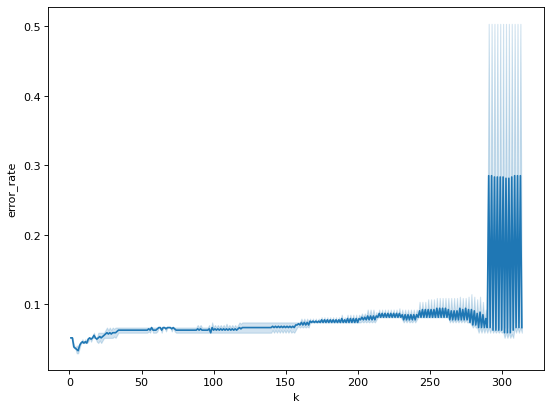

In [29]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sns.lineplot(data=grid, x="k", y="error_rate")

As k value increases error rate also increases

<AxesSubplot:xlabel='k', ylabel='error_rate'>

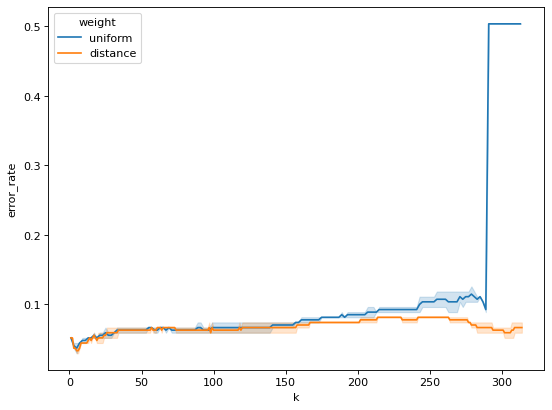

In [30]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sns.lineplot(data=grid, x="k", y="error_rate", hue="weight")

<AxesSubplot:xlabel='k', ylabel='error_rate'>

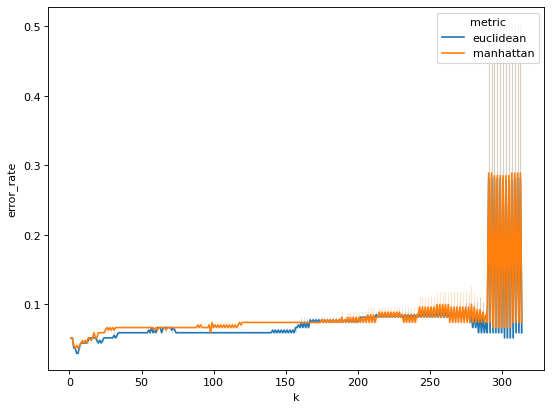

In [31]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sns.lineplot(data=grid, x="k", y="error_rate", hue="metric")

In [32]:
print(best_params)

{'error_rate': 0.02962962962962963, 'k': 5.0, 'metric': 'euclidean', 'weight': 'uniform'}


In [33]:
y_pred = multi_predict(X_train, y_train, k=int(best_params['k']),input_values=X_test, metric=best_params['metric'], weight=best_params['weight'])

In [34]:
def report(y_true, y_pred):
    print(classification_report(y_true,y_pred),'\n')
    cf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

              precision    recall  f1-score   support

           2       0.97      0.97      0.97        68
           4       0.97      0.97      0.97        67

    accuracy                           0.97       135
   macro avg       0.97      0.97      0.97       135
weighted avg       0.97      0.97      0.97       135
 



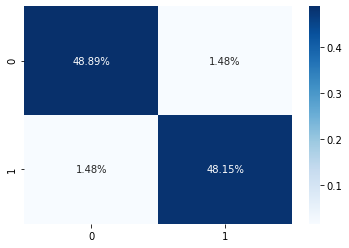

In [35]:
report(y_test, y_pred)

## Disadvantages of k-NN

- **Curse of dimensionality**: In k-NN the distance between instances is calculated based on all attributes of the instance, as a result difficulty may arise when many irrelevant attributes are present in the dataset. Because, the similarity metric used by k-NN depends on all the attributes in the dataset and it can be easily misled if the distance between neighbors is dominated by the irrelevant attributes. This problem is referred to as the curse of dimensionality. Nearest-neighbor approaches are especially sensitive to this problem.
- Computation time: As k-NN algorithm delays all processing until a new query is received, significant computation can be required to process each new query.

## Conclusion:

K Nearest Neighbor classification algorithm was used for classifying the points given in the dataset.